In [1]:
import pandas as pd

# Veri setlerini yükleyin
netflix_df = pd.read_csv('C:/Users/cmbme/OneDrive/Masaüstü/ML Project/Databases/netflix/netflix_titles.csv')
amazon_df = pd.read_csv('C:/Users/cmbme/OneDrive/Masaüstü/ML Project/Databases/amazon/amazon_prime_titles.csv')

# Temel veri temizliği: release_year, duration ve listed_in sütunlarında eksik verileri kaldırma
netflix_df.dropna(subset=['release_year', 'duration', 'listed_in'], inplace=True)
amazon_df.dropna(subset=['release_year', 'duration', 'listed_in'], inplace=True)

# Filmleri ayırma
netflix_movies = netflix_df[netflix_df['type'] == 'Movie'].copy()
amazon_movies = amazon_df[amazon_df['type'] == 'Movie'].copy()

# Filmler için duration'ı dakika olarak ayarlama
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)
amazon_movies['duration'] = amazon_movies['duration'].str.replace(' min', '').astype(int)

# Sadece listed_in sütunundaki ilk kategoriyi kullanma
netflix_movies['category'] = netflix_movies['listed_in'].str.split(', ').str[0]
amazon_movies['category'] = amazon_movies['listed_in'].str.split(', ').str[0]


In [2]:
netflix_category_duration = netflix_movies.groupby('category')['duration'].mean().reset_index()
print("Netflix kategorileri ve ortalama süreleri:")
print(netflix_category_duration)


Netflix kategorileri ve ortalama süreleri:
                    category    duration
0         Action & Adventure  113.515716
1             Anime Features   90.333333
2   Children & Family Movies   78.426446
3             Classic Movies  114.825000
4                   Comedies  106.687603
5                Cult Movies  102.500000
6              Documentaries   82.149578
7                     Dramas  111.377500
8              Horror Movies   98.174545
9         Independent Movies   98.700000
10      International Movies  108.062500
11              LGBTQ Movies   99.000000
12                    Movies   45.481481
13          Music & Musicals   89.555556
14           Romantic Movies   83.333333
15          Sci-Fi & Fantasy  106.615385
16             Sports Movies   87.000000
17           Stand-Up Comedy   66.913174
18                 Thrillers   99.953846


In [3]:
amazon_category_duration = amazon_movies.groupby('category')['duration'].mean().reset_index()
print("Amazon kategorileri ve ortalama süreleri:")
print(amazon_category_duration)


Amazon kategorileri ve ortalama süreleri:
                     category    duration
0                      Action  101.036618
1                   Adventure   98.220339
2                   Animation   51.808594
3                       Anime   85.875000
4                    Arthouse   91.900763
5                        Arts   73.421429
6                      Comedy   96.801277
7                 Documentary   81.747994
8                       Drama  100.340271
9      Faith and Spirituality   59.166667
10                    Fantasy   89.437500
11                    Fitness   20.958333
12                 Historical  103.666667
13                     Horror   88.766284
14              International  118.432432
15                       Kids   42.716535
16                      LGBTQ   85.000000
17           Military and War   70.400000
18  Music Videos and Concerts   48.830000
19                    Romance  115.655462
20            Science Fiction   87.794118
21           Special Interest  130

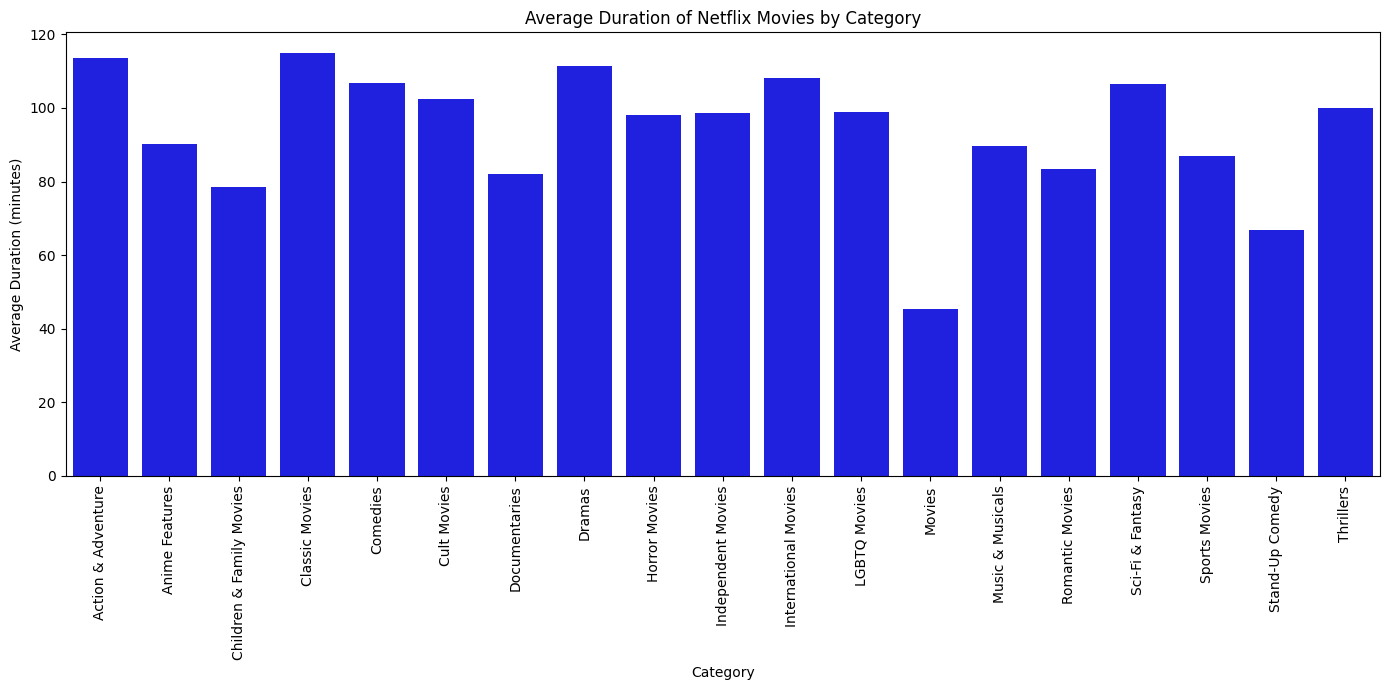

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(x='category', y='duration', data=netflix_category_duration, color='b')
plt.title('Average Duration of Netflix Movies by Category')
plt.xlabel('Category')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




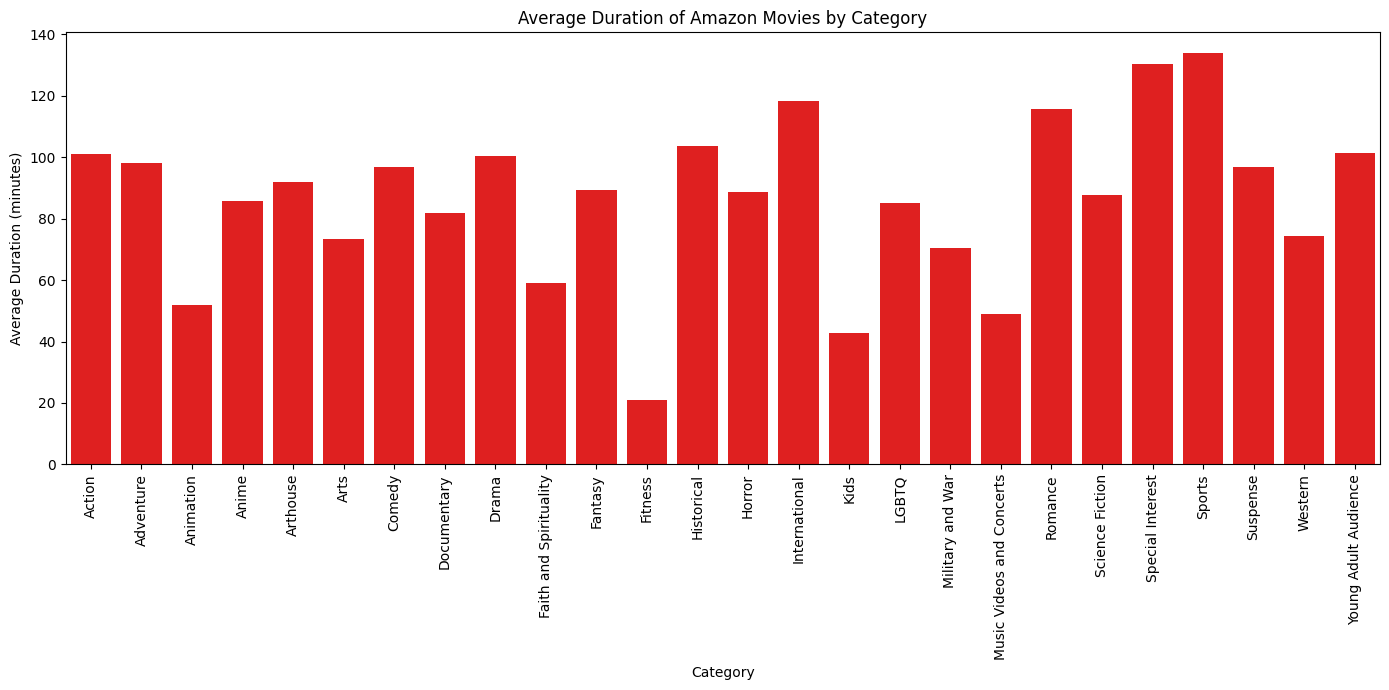

In [5]:
plt.figure(figsize=(14, 7))
sns.barplot(x='category', y='duration', data=amazon_category_duration, color='r')
plt.title('Average Duration of Amazon Movies by Category')
plt.xlabel('Category')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
